In [ ]:
%reset

In [216]:
%run 'Functions.ipynb'
import networkx as nx

In [17]:
def train_net(data, labels, n_iter):
    
    data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.01)
    
    model = Sequential()

    init = initializers.Orthogonal(gain=1.0, seed=None)

    model.add(Dense(1, input_dim=data_train.shape[1], activation='sigmoid', kernel_initializer=init))
    model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

    opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

    model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  verbose=0)

    model.fit(data_train, labels_train, epochs=n_iter, batch_size=400, shuffle=True, verbose=0)
    weights = model.layers[0].get_weights()[0]
    proba = model.predict_proba(data_test, batch_size=100, verbose=0)
    predicted = proba.flatten()
    
    _, _, R, _, _ = stats.linregress(labels_test, predicted)
    
    return weights

In [220]:
cliques = {}

for chunk in ['S5']:
    
    print(chunk)
    
    data = {}

    data_1, labels, unique_mutations, aa_seq = read_data(chunk)
    data_2, labels, combinations = read_data_doubles(chunk)
    data_12 = np.append(data_1,data_2, axis=1)
    
    print ("Training NN")
    weights = (train_net(data_12,labels,500))
    
    allMutations = []
    allMutations.extend(unique_mutations)
    allMutations.extend(combinations)
    
    weightsDict = {}

    for i in range(len(weights)):
        weightsDict[allMutations[i]] = np.abs(weights[i][0])
        
    connections = []

    for comb in combinations:
        if weightsDict[comb] >= max(weightsDict.values())*0.5:
            connections.append(comb)
            
    H = nx.Graph()
    H.size = {}
    H.color = {}
    H.width = {}

    print ('Building the graph')
    for i in unique_mutations:
        H.add_node(i)

    for i in connections:
        H.add_edge(i[0], i[1], {'color':'gray','thickness':2})
        
    cliques[chunk] = []
    for i in nx.find_cliques(H):
        cliques[chunk].append(i)

S5
Training NN
Building the graph


In [221]:
nx.greedy_color(H)

{'0H': 0,
 '0Y': 0,
 '20K': 0,
 '21A': 0,
 '22S': 0,
 '23I': 0,
 '24T': 0,
 '25L': 0,
 '25S': 0,
 '26T': 0,
 '27E': 0,
 '28K': 0,
 '29D': 0,
 '2N': 0,
 '2T': 0,
 '30E': 0,
 '8A': 0}

In [222]:
cliquesLen = {}

for key in cliques:
    cliquesLen[key] = [len(val) for val in cliques[key]]
    

In [189]:
for chunk in cliquesLen:
    if len(cliquesLen[chunk]) < 85:
        cliquesLen[chunk].extend(np.ones((85 - len(cliquesLen[chunk])))*-2)


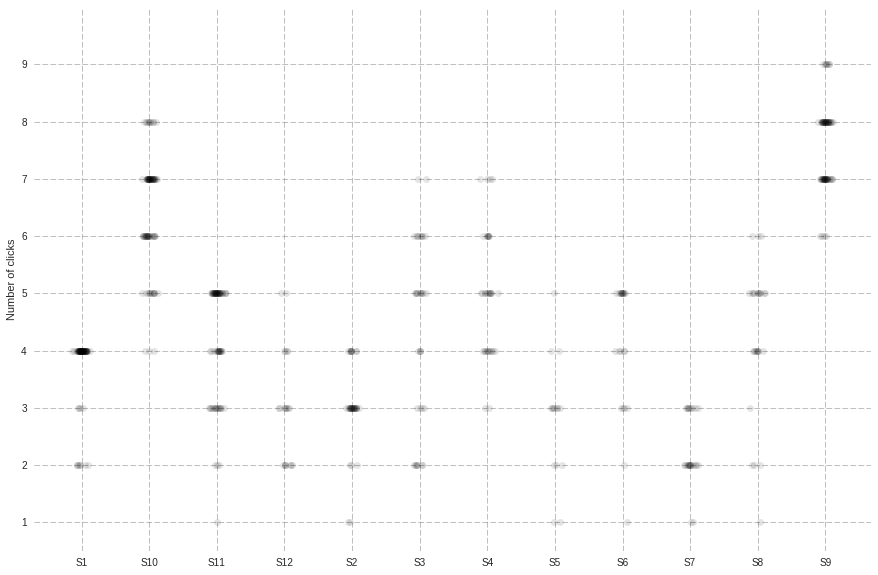

In [191]:
df = pd.DataFrame.from_dict(cliquesLen)
fig,ax = plt.subplots(figsize=[15,10])
plt.ylabel('Number of clicks')
# df.boxplot()
i=0
for col in df.columns:
    i+=1
    y = df[col]
    x = np.random.normal(i, 0.05, len(y))
    ax.plot(x, y, 'ko', alpha=0.1, ms=7)
plt.xticks(range(1,13))
plt.yticks(range(1,10))
plt.ylim(0.5,10)
ax.set_xticklabels(df.columns)
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray');

In [ ]:
chunk = 'S1'
data = {}

data_1, labels, unique_mutations = read_data(chunk)
data_2, labels, combinations = read_data_doubles(chunk)
data_12 = np.append(data_1,data_2, axis=1)

In [208]:
weights = (train_net(data_12,labels,100))

In [209]:
allMutations = []
allMutations.extend(unique_mutations)
allMutations.extend(combinations)

In [210]:
weightsDict = {}

for i in range(len(weights)):
    weightsDict[allMutations[i]] = np.abs(weights[i][0])

In [211]:
connections = []

for comb in combinations:
    if weightsDict[comb] >= 0.5:
        connections.append(comb)

Building the graph
Plotting the graph


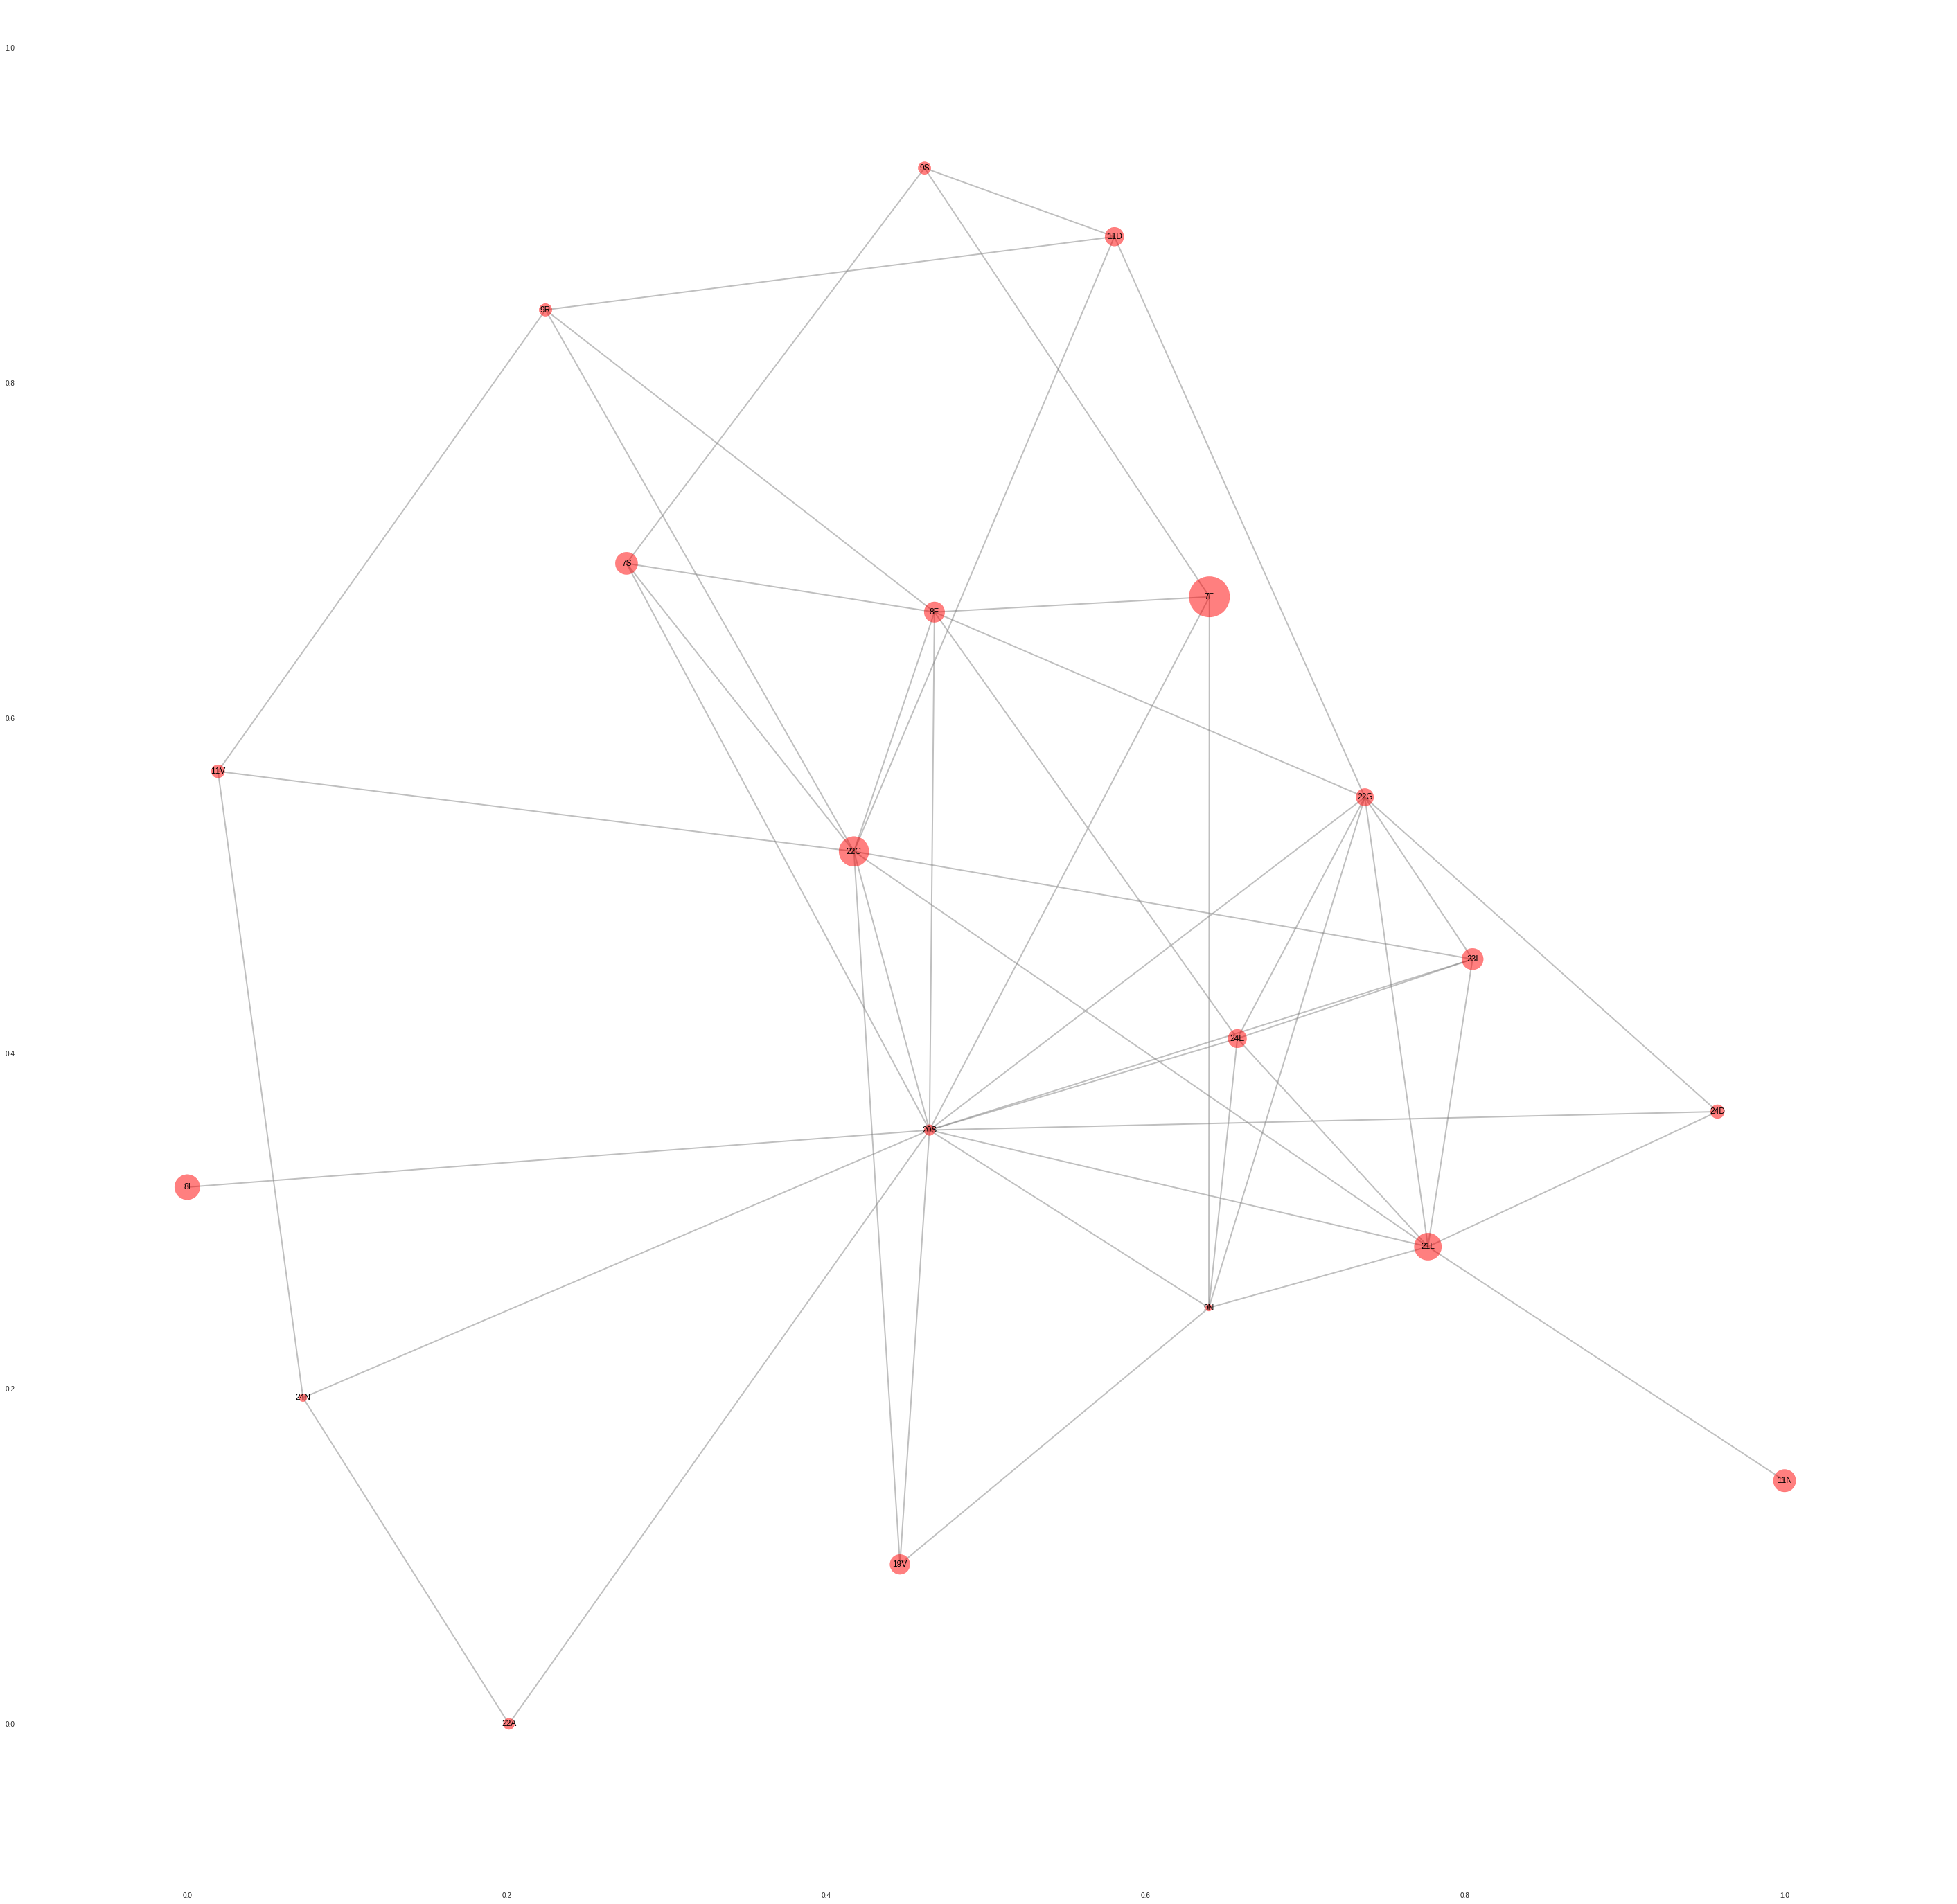

In [200]:
H = nx.Graph()
H.size = {}
H.color = {}
H.width = {}

print ('Building the graph')
for i in unique_mutations:

    H.add_node(i)
    H.size[i]=weightsDict[i]*1000
    H.color[i]='red'

for i in connections:
    H.add_edge(i[0], i[1], {'color':'gray','thickness':2})

color=[attribs['color'] for (v_from,v_to,attribs) in H.edges(data=True)]
thickness=[attribs['thickness'] for (v_from,v_to,attribs) in H.edges(data=True)]

print ('Plotting the graph')
plt.figure(figsize=[50,50])
nx.draw_networkx(H,with_labels=True,node_color=[H.color[v] for v in H],\
                 node_size=[H.size[v] for v in H], alpha=0.5,\
                 width=thickness,edge_color=color)

In [204]:
connections

[]

In [111]:
for i in nx.find_cliques(H):
    print (i)

['108V', '111F']
['106K']
['131S', '110N', '108I']
['131S', '115T', '108M']
['131S', '115T', '110D', '111I']
['131S', '115T', '110D', '106N']
['131S', '115T', '110E']
['131S', '115T', '135F']
['131S', '115T', '106D']
['131S', '115A', '110D', '111I']
['131S', '115A', '110D', '106N']
['131S', '115A', '110E']
['131S', '115A', '106D']
['131S', '115A', '110P', '111I']
['131S', '115A', '108M']
['131S', '115A', '135F']
['131S', '115A', '108I']
['131S', '110P', '111F']
['131S', '115E', '110D', '111I']
['131S', '115E', '110D', '106N']
['131S', '115E', '110E']
['131S', '115E', '111F', '108M']
['131S', '115E', '111F', '108I']
['131S', '115E', '110H']
['131S', '115E', '135F']
['131S', '115E', '106D']
['112T', '115E', '110D']
['112T', '115E', '110E']
['110K', '115E', '111F']
['110T']
['112K', '110N']
['112K', '110D']
['110Q']
['114I', '135F']
['114L', '108M']
